In [1]:
## Relational Data
## DataSet came from Kaggle
## https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("HouseSet.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

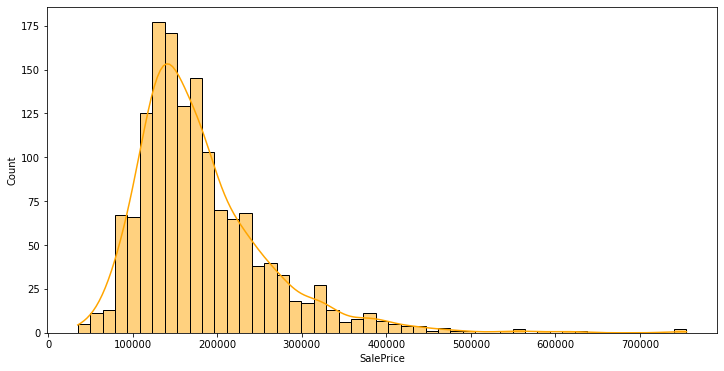

In [6]:
plt.figure(figsize = (12,6))
sns.histplot(data=df, kde=True, x='SalePrice', color="orange")

<AxesSubplot:xlabel='SalePrice'>

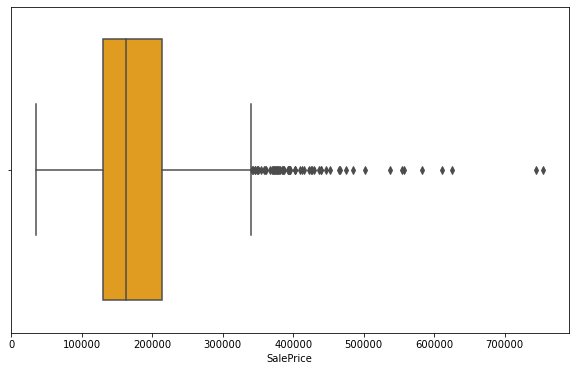

In [8]:
plt.figure(figsize = (10,6))
sns.boxplot(x=df["SalePrice"], color = "orange")

In [11]:
# Examine missing values in our data by column
mv_count = df.isnull().sum()
mv_percentage = (df.isnull().sum() * 100 / len(df)).round(2)
column_type = df.dtypes

mv_summary = pd.DataFrame({
    'Missing Count': mv_count,           
    'Percentage Missing': mv_percentage,  
    'Column Type': column_type
})

mv_summary_ascending = mv_summary[mv_count > 0].sort_values('Percentage Missing', ascending=False)

print("Summary of Missing Values:")
print(mv_summary_ascending)

Summary of Missing Values:
              Missing Count  Percentage Missing Column Type
PoolQC                 1453               99.52      object
MiscFeature            1406               96.30      object
Alley                  1369               93.77      object
Fence                  1179               80.75      object
FireplaceQu             690               47.26      object
LotFrontage             259               17.74     float64
GarageType               81                5.55      object
GarageYrBlt              81                5.55     float64
GarageFinish             81                5.55      object
GarageQual               81                5.55      object
GarageCond               81                5.55      object
BsmtExposure             38                2.60      object
BsmtFinType2             38                2.60      object
BsmtFinType1             37                2.53      object
BsmtCond                 37                2.53      object
BsmtQual     

In [12]:
na_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
df[na_columns] = df[na_columns].fillna('None')

In [13]:
null_count = df.isnull().sum()
null_percentage = (df.isnull().sum() * 100 / len(df)).round(2)
column_type = df.dtypes

null_summary = pd.DataFrame({
    'Missing Count': null_count,
    'Percentage Missing': null_percentage,
    'Column Type': column_type
})

null_summary_only_missing = null_summary[null_count > 0].sort_values('Percentage Missing', ascending=False)

print("Updated Summary of Missing Values:")
print(null_summary_only_missing)

Updated Summary of Missing Values:
             Missing Count  Percentage Missing Column Type
LotFrontage            259               17.74     float64
GarageYrBlt             81                5.55     float64
MasVnrArea               8                0.55     float64
Electrical               1                0.07      object


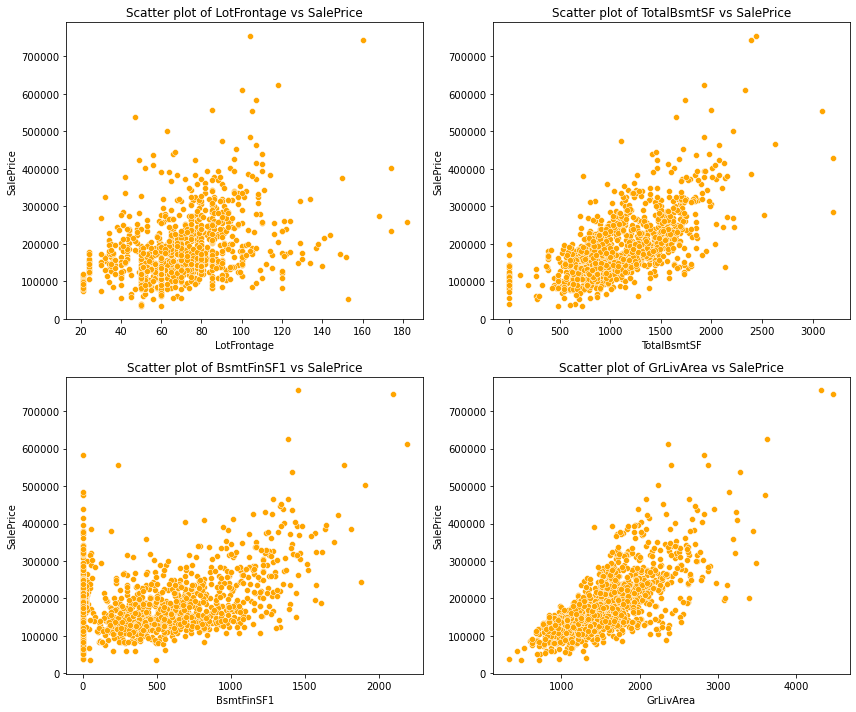

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop extreme outliers
df = df.drop(df[df['LotFrontage'] > 200].index)
df = df.drop(df[df['TotalBsmtSF'] > 4000].index)
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index)

outlier_vars = ['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(2):
    for j in range(2):
        index = 2 * i + j  
        if index < len(outlier_vars):
            sns.scatterplot(x=outlier_vars[index], y='SalePrice', data=df, ax=axs[i, j], color='orange')
            axs[i, j].set_title(f'Scatter plot of {outlier_vars[index]} vs SalePrice')

fig.tight_layout()
plt.show()


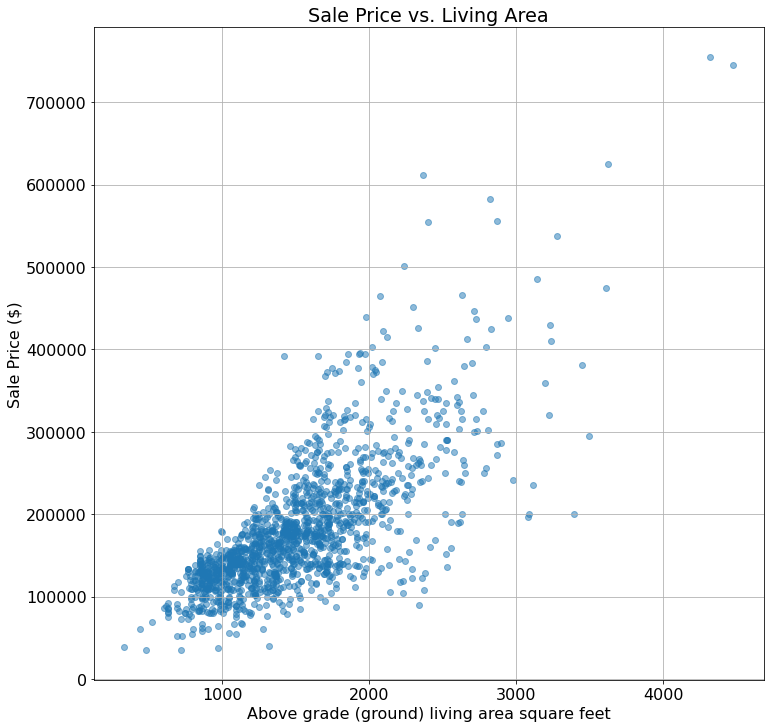

In [18]:
#Plotting GrLivArea for SalePrice
plt.rcParams.update({'font.size': 16})  

plt.figure(figsize=(12, 12))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Living Area')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()